In [2]:
import math

import jupyter_cadquery as jcq
from jupyter_cadquery.replay import show

from build123d import *

Overwriting auto display for cadquery Workplane and Shape


In [3]:
jcq.set_defaults(
    control="orbit",
    axes=True,
    axes0=True,
    grid=(True, False, False),
    glass=True,
    theme="browser",
)

In [4]:
%%html
<style>
/* Fix widget background color in VS Code */
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
</style>

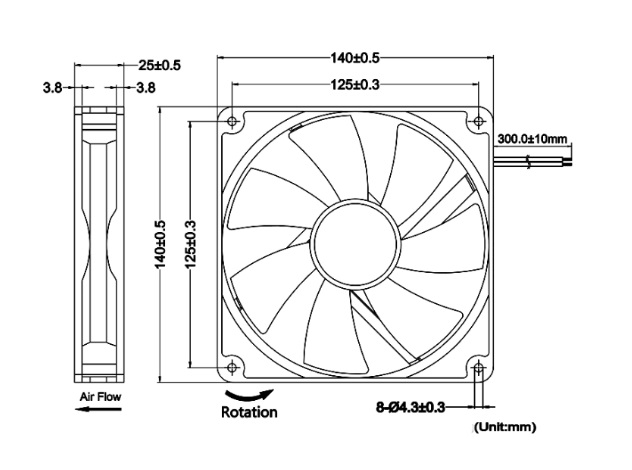

In [24]:
fan_size = 140 + 0.1
fan_filter_r = 8.5
filter_r = 145 / 2
filter_flange_r = 155 / 2 - 0.05
filter_flange_h = 2.5 + 0.3
thickness = 1.5
h1 = 4
h2 = 10

with BuildPart() as connecotr:
    b = Box(
        fan_size + thickness * 2,
        fan_size + thickness * 2,
        h1+thickness,
        align=(Align.CENTER, Align.CENTER, Align.MIN),
    )
    f = fillet(b.edges().filter_by(Axis.Z), fan_filter_r+thickness)
    top = f.faces().sort_by(Axis.Z).last
    Cylinder(filter_flange_r, h1+thickness, align=(Align.CENTER, Align.CENTER, Align.MIN))
    Cylinder(filter_r, h2, align=(Align.CENTER, Align.CENTER, Align.MAX))
    Cylinder(filter_flange_r, filter_flange_h, align=(Align.CENTER, Align.CENTER, Align.MAX))
    with BuildSketch(top):
        offset(top, amount=-thickness)
    extrude(amount=-h1, mode=Mode.SUBTRACT)
    #with Workplanes(Plane.XY.offset(-h2)):
    #    Hole(filter_r-thickness, depth=h2+thickness)
    #z_faces = connecotr.faces().sort_by(Axis.Z)
    #top_and_bottom = [z_faces.first, z_faces.last]
    #offset(amount=-thickness, openings=top_and_bottom)
    #f = connecotr.faces().filter_by_position(Axis.Z, 0, 0)
    #faces = [
    #    f.sort_by(Axis.X).first,
    #    f.sort_by(Axis.X).last,
    #    f.sort_by(Axis.Y).first,
    #    f.sort_by(Axis.Y).last,
    #]
    #extrude(faces, amount=5)
    with BuildSketch(connecotr.faces().sort_by(Axis.Z).first):
        Circle(filter_r-thickness)
        Rectangle(fan_size, fan_size, mode=Mode.INTERSECT)
    extrude(amount=-h2-thickness,mode=Mode.SUBTRACT)

show(connecotr)
connecotr.part.export_step("/tmp/xiaomi_140_connector.step")

CadViewerWidget(anchor=None, cad_width=800, glass=True, height=600, pinning=False, theme='browser', title=None…


*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 0                      ******
** WorkSession : Sending all data
 Step File Name : /tmp/xiaomi_140_connector.step(2787 ents)  Write  Done


<IFSelect_ReturnStatus.IFSelect_RetDone: 1>